In [3]:
import pandas as pd, matplotlib.pyplot as plt, numpy as np

In [1]:
ls data/

P00000001-ALL.csv  P00000001D-ALL.csv  president_polls.csv
P00000001-ALL.zip  P00000001D-ALL.zip  president_primary_polls.csv


In [29]:
data_dir = 'data/president_primary_polls.csv'
raw_polls = pd.read_csv(data_dir, parse_dates=['created_at', 'start_date', 'end_date'])
columns_to_keep = ['poll_id', 'start_date', 'end_date', 'party', 'candidate_name', 'pct', 'created_at', 'state', 'pollster', 'sponsors', 'pollster_rating_name', 'fte_grade', 'sample_size']
df = raw_polls[columns_to_keep]

In [30]:
df

poll_id start_date   end_date party          candidate_name   pct  \
0        62234 2019-10-21 2019-10-22   DEM     Joseph R. Biden Jr.  27.0   
1        62234 2019-10-21 2019-10-22   DEM        Elizabeth Warren  19.0   
2        62234 2019-10-21 2019-10-22   DEM         Bernard Sanders  14.0   
3        62234 2019-10-21 2019-10-22   DEM          Pete Buttigieg   6.0   
4        62234 2019-10-21 2019-10-22   DEM        Kamala D. Harris   5.0   
5        62234 2019-10-21 2019-10-22   DEM           Beto O'Rourke   3.0   
6        62234 2019-10-21 2019-10-22   DEM          Cory A. Booker   1.0   
7        62234 2019-10-21 2019-10-22   DEM           Amy Klobuchar   1.0   
8        62234 2019-10-21 2019-10-22   DEM             Andrew Yang   2.0   
9        62234 2019-10-21 2019-10-22   DEM                Tim Ryan   1.0   
10       62234 2019-10-21 2019-10-22   DEM           Steve Bullock   0.0   
11       62234 2019-10-21 2019-10-22   DEM           Julián Castro   1.0   
12       62234 2019-10-21 2019-10-22   DEM         John K. Delaney   0.0   
13       62234 2019-10-21 2019-10-22   DEM           Tulsi Gabbard   0.0   
14       62234 2019-10-21 2019-10-22   DEM              Tom Steyer   1.0   
15       62234 2019-10-21 2019-10-22   DEM              Joe Sestak   1.0   
16       62234 2019-10-21 2019-10-22   DEM            Wayne Messam   1.0   
17       62234 2019-10-21 2019-10-22   DEM     Marianne Williamson   0.0   
18       62234 2019-10-21 2019-10-22   DEM       Michael F. Bennet   1.0   
19       62241 2019-10-20 2019-10-22   REP            Donald Trump  87.0   
20       62241 2019-10-20 2019-10-22   REP            Mark Sanford   3.0   
21       62241 2019-10-20 2019-10-22   REP               Joe Walsh   1.0   
22       62241 2019-10-20 2019-10-22   REP         William F. Weld   1.0   
23       62241 2019-10-20 2019-10-22   DEM     Joseph R. Biden Jr.  24.0   
24       62241 2019-10-20 2019-10-22   DEM        Elizabeth Warren  21.0   
25       62241 2019-10-20 2019-10-22   DEM         Bernard Sanders  15.0   
26       62241 2019-10-20 2019-10-22   DEM          Pete Buttigieg   8.0   
27       62241 2019-10-20 2019-10-22   DEM        Kamala D. Harris   5.0   
28       62241 2019-10-20 2019-10-22   DEM             Andrew Yang   3.0   
29       62241 2019-10-20 2019-10-22   DEM           Tulsi Gabbard   3.0   
...        ...        ...        ...   ...                     ...   ...   
12299    57181 2018-11-07 2018-11-14   DEM         Bernard Sanders  14.0   
12300    57181 2018-11-07 2018-11-14   DEM     Joseph R. Biden Jr.  19.0   
12301    57181 2018-11-07 2018-11-14   DEM           Beto O'Rourke  10.0   
12302    56853 2018-11-07 2018-11-09   DEM     Joseph R. Biden Jr.  26.0   
12303    56853 2018-11-07 2018-11-09   DEM         Bernard Sanders  19.0   
12304    56853 2018-11-07 2018-11-09   DEM        Elizabeth Warren   5.0   
12305    56853 2018-11-07 2018-11-09   DEM           Beto O'Rourke   8.0   
12306    56853 2018-11-07 2018-11-09   DEM          Cory A. Booker   3.0   
12307    56853 2018-11-07 2018-11-09   DEM        Kamala D. Harris   4.0   
12308    56853 2018-11-07 2018-11-09   DEM           Sherrod Brown   1.0   
12309    56853 2018-11-07 2018-11-09   DEM           Amy Klobuchar   1.0   
12310    56853 2018-11-07 2018-11-09   DEM   Kirsten E. Gillibrand   1.0   
12311    56853 2018-11-07 2018-11-09   DEM          Eric H. Holder   0.0   
12312    56853 2018-11-07 2018-11-09   DEM            Andrew Cuomo   1.0   
12313    56853 2018-11-07 2018-11-09   DEM         John K. Delaney   0.0   
12314    56853 2018-11-07 2018-11-09   DEM           Deval Patrick   0.0   
12315    56853 2018-11-07 2018-11-09   DEM           Julián Castro   1.0   
12316    56853 2018-11-07 2018-11-09   DEM            Gavin Newsom   1.0   
12317    56853 2018-11-07 2018-11-09   DEM           Eric Garcetti   1.0   
12318    56853 2018-11-07 2018-11-09   DEM        Michael Avenatti   0.0   
12319    56853 2018-11-07 2018-11-09   DEM           St

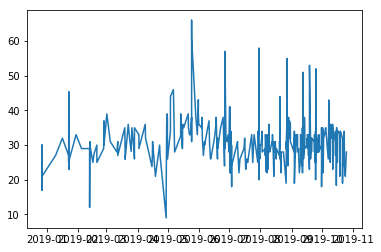

In [26]:
def polling_over_time(df, candidate):
    # returns dictionary of candidates percentage over time in national polls
    return df[df.state.isnull()].query('candidate_name == @candidate').sort_values('created_at', ascending=False)[['created_at','pct']]

temp = polling_over_time(df, 'Joseph R. Biden Jr.')
plt.plot(temp.created_at, temp.pct)


In [ ]:
raw_polls[raw_polls.]

In [10]:
for poll in raw_polls.groupby('poll_id'):
    print(poll)

(56853,        question_id  poll_id  cycle state  pollster_id         pollster  \
12302        92393    56853   2020   NaN         1189  Morning Consult   
12303        92393    56853   2020   NaN         1189  Morning Consult   
12304        92393    56853   2020   NaN         1189  Morning Consult   
12305        92393    56853   2020   NaN         1189  Morning Consult   
12306        92393    56853   2020   NaN         1189  Morning Consult   
12307        92393    56853   2020   NaN         1189  Morning Consult   
12308        92393    56853   2020   NaN         1189  Morning Consult   
12309        92393    56853   2020   NaN         1189  Morning Consult   
12310        92393    56853   2020   NaN         1189  Morning Consult   
12311        92393    56853   2020   NaN         1189  Morning Consult   
12312        92393    56853   2020   NaN         1189  Morning Consult   
12313        92393    56853   2020   NaN         1189  Morning Consult   
12314        92393    56853   

[23 rows x 32 columns])
(57380,        question_id  poll_id  cycle state  pollster_id         pollster  \
11871        92826    57380   2020   NaN         1189  Morning Consult   
11872        92826    57380   2020   NaN         1189  Morning Consult   
11873        92826    57380   2020   NaN         1189  Morning Consult   
11874        92826    57380   2020   NaN         1189  Morning Consult   
11875        92826    57380   2020   NaN         1189  Morning Consult   
11876        92826    57380   2020   NaN         1189  Morning Consult   
11877        92826    57380   2020   NaN         1189  Morning Consult   
11878        92826    57380   2020   NaN         1189  Morning Consult   
11879        92826    57380   2020   NaN         1189  Morning Consult   
11880        92826    57380   2020   NaN         1189  Morning Consult   
11881        92826    57380   2020   NaN         1189  Morning Consult   
11882        92826    57380   2020   NaN         1189  Morning Consult   
11883 

[29 rows x 32 columns])
(57532,        question_id  poll_id  cycle state  pollster_id         pollster  \
11520        93170    57532   2020   NaN         1102  Emerson College   
11521        93170    57532   2020   NaN         1102  Emerson College   
11522        93171    57532   2020   NaN         1102  Emerson College   
11523        93171    57532   2020   NaN         1102  Emerson College   
11524        93171    57532   2020   NaN         1102  Emerson College   
11525        93171    57532   2020   NaN         1102  Emerson College   
11526        93171    57532   2020   NaN         1102  Emerson College   
11527        93171    57532   2020   NaN         1102  Emerson College   
11528        93171    57532   2020   NaN         1102  Emerson College   
11529        93171    57532   2020   NaN         1102  Emerson College   
11530        93171    57532   2020   NaN         1102  Emerson College   
11531        93171    57532   2020   NaN         1102  Emerson College   
11532 

[19 rows x 32 columns])
(57628,        question_id  poll_id  cycle state  pollster_id pollster sponsor_ids  \
11168        93465    57628   2020   NaN          744    Ipsos          71   
11169        93465    57628   2020   NaN          744    Ipsos          71   
11170        93465    57628   2020   NaN          744    Ipsos          71   
11171        93465    57628   2020   NaN          744    Ipsos          71   
11172        93465    57628   2020   NaN          744    Ipsos          71   
11173        93465    57628   2020   NaN          744    Ipsos          71   
11174        93465    57628   2020   NaN          744    Ipsos          71   
11175        93465    57628   2020   NaN          744    Ipsos          71   

      sponsors display_name  pollster_rating_id  ... tracking  \
11168  Reuters        Ipsos               154.0  ...     True   
11169  Reuters        Ipsos               154.0  ...     True   
11170  Reuters        Ipsos               154.0  ...     True   
11171

[8 rows x 32 columns])
(57711,        question_id  poll_id  cycle state  pollster_id pollster sponsor_ids  \
10914        93660    57711   2020   NaN          744    Ipsos          71   
10915        93660    57711   2020   NaN          744    Ipsos          71   
10916        93660    57711   2020   NaN          744    Ipsos          71   
10917        93660    57711   2020   NaN          744    Ipsos          71   
10918        93660    57711   2020   NaN          744    Ipsos          71   
10919        93660    57711   2020   NaN          744    Ipsos          71   
10920        93660    57711   2020   NaN          744    Ipsos          71   
10921        93660    57711   2020   NaN          744    Ipsos          71   

      sponsors display_name  pollster_rating_id  ... tracking  \
10914  Reuters        Ipsos               154.0  ...     True   
10915  Reuters        Ipsos               154.0  ...     True   
10916  Reuters        Ipsos               154.0  ...     True   
10917 

(57809,        question_id  poll_id  cycle state  pollster_id            pollster  \
10532        93919    57809   2020   NaN         1416  Harris Interactive   
10533        93919    57809   2020   NaN         1416  Harris Interactive   
10534        93919    57809   2020   NaN         1416  Harris Interactive   
10535        93919    57809   2020   NaN         1416  Harris Interactive   
10536        93919    57809   2020   NaN         1416  Harris Interactive   
10537        93919    57809   2020   NaN         1416  Harris Interactive   
10538        93919    57809   2020   NaN         1416  Harris Interactive   
10539        93919    57809   2020   NaN         1416  Harris Interactive   
10540        93919    57809   2020   NaN         1416  Harris Interactive   
10541        93919    57809   2020   NaN         1416  Harris Interactive   
10542        93919    57809   2020   NaN         1416  Harris Interactive   
10543        93919    57809   2020   NaN         1416  Harris Intera

(57922,        question_id  poll_id  cycle state  pollster_id          pollster  \
10094        94175    57922   2020  Iowa          801  Gravis Marketing   
10095        94175    57922   2020  Iowa          801  Gravis Marketing   
10096        94175    57922   2020  Iowa          801  Gravis Marketing   
10097        94175    57922   2020  Iowa          801  Gravis Marketing   
10098        94175    57922   2020  Iowa          801  Gravis Marketing   
10099        94175    57922   2020  Iowa          801  Gravis Marketing   
10100        94175    57922   2020  Iowa          801  Gravis Marketing   
10101        94175    57922   2020  Iowa          801  Gravis Marketing   
10102        94175    57922   2020  Iowa          801  Gravis Marketing   
10103        94175    57922   2020  Iowa          801  Gravis Marketing   
10104        94175    57922   2020  Iowa          801  Gravis Marketing   
10105        94175    57922   2020  Iowa          801  Gravis Marketing   
10106        9417

(58000,       question_id  poll_id  cycle     state  pollster_id         pollster  \
9803        94353    58000   2020  Virginia         1365  Change Research   
9804        94353    58000   2020  Virginia         1365  Change Research   
9805        94353    58000   2020  Virginia         1365  Change Research   
9806        94353    58000   2020  Virginia         1365  Change Research   
9807        94353    58000   2020  Virginia         1365  Change Research   
9808        94353    58000   2020  Virginia         1365  Change Research   
9809        94353    58000   2020  Virginia         1365  Change Research   
9810        94353    58000   2020  Virginia         1365  Change Research   
9811        94353    58000   2020  Virginia         1365  Change Research   
9812        94353    58000   2020  Virginia         1365  Change Research   
9813        94353    58000   2020  Virginia         1365  Change Research   
9814        94353    58000   2020  Virginia         1365  Change Res

[46 rows x 32 columns])
(58082,       question_id  poll_id  cycle         state  pollster_id  \
9424        94490    58082   2020  Pennsylvania          396   
9425        94490    58082   2020  Pennsylvania          396   
9426        94490    58082   2020  Pennsylvania          396   
9427        94490    58082   2020  Pennsylvania          396   
9428        94490    58082   2020  Pennsylvania          396   
9429        94490    58082   2020  Pennsylvania          396   
9430        94490    58082   2020  Pennsylvania          396   
9431        94490    58082   2020  Pennsylvania          396   
9432        94490    58082   2020  Pennsylvania          396   
9433        94490    58082   2020  Pennsylvania          396   
9434        94490    58082   2020  Pennsylvania          396   
9435        94490    58082   2020  Pennsylvania          396   
9436        94490    58082   2020  Pennsylvania          396   
9437        94490    58082   2020  Pennsylvania          396   
9438    

(58171,       question_id  poll_id  cycle state  pollster_id pollster sponsor_ids  \
8873        94737    58171   2020   NaN         1361     SSRS         143   
8874        94737    58171   2020   NaN         1361     SSRS         143   
8875        94737    58171   2020   NaN         1361     SSRS         143   
8876        94737    58171   2020   NaN         1361     SSRS         143   
8877        94737    58171   2020   NaN         1361     SSRS         143   
8878        94737    58171   2020   NaN         1361     SSRS         143   
8879        94737    58171   2020   NaN         1361     SSRS         143   
8880        94737    58171   2020   NaN         1361     SSRS         143   
8881        94737    58171   2020   NaN         1361     SSRS         143   
8882        94737    58171   2020   NaN         1361     SSRS         143   
8883        94737    58171   2020   NaN         1361     SSRS         143   
8884        94737    58171   2020   NaN         1361     SSRS       

[15 rows x 32 columns])
(58460,       question_id  poll_id  cycle           state  pollster_id  \
9022        97916    58460   2020  South Carolina          573   
9023        97916    58460   2020  South Carolina          573   
9024        97916    58460   2020  South Carolina          573   
9025        97916    58460   2020  South Carolina          573   
9026        97916    58460   2020  South Carolina          573   
9027        97916    58460   2020  South Carolina          573   
9028        97916    58460   2020  South Carolina          573   
9029        97916    58460   2020  South Carolina          573   
9030        97916    58460   2020  South Carolina          573   
9031        97916    58460   2020  South Carolina          573   
9032        97916    58460   2020  South Carolina          573   
9033        97916    58460   2020  South Carolina          573   
9034        97916    58460   2020  South Carolina          573   
9035        97916    58460   2020  South Car

(58535,       question_id  poll_id  cycle state  pollster_id         pollster  \
7909        98291    58535   2020   NaN         1102  Emerson College   
7910        98291    58535   2020   NaN         1102  Emerson College   
7911        98292    58535   2020   NaN         1102  Emerson College   
7912        98292    58535   2020   NaN         1102  Emerson College   
7913        98292    58535   2020   NaN         1102  Emerson College   
7914        98292    58535   2020   NaN         1102  Emerson College   
7915        98292    58535   2020   NaN         1102  Emerson College   
7916        98292    58535   2020   NaN         1102  Emerson College   
7917        98292    58535   2020   NaN         1102  Emerson College   
7918        98292    58535   2020   NaN         1102  Emerson College   
7919        98292    58535   2020   NaN         1102  Emerson College   
7920        98292    58535   2020   NaN         1102  Emerson College   
7921        98292    58535   2020   NaN    

(58595,       question_id  poll_id  cycle state  pollster_id            pollster  \
7353        98911    58595   2020  Iowa          458  Suffolk University   
7354        98911    58595   2020  Iowa          458  Suffolk University   
7355        98911    58595   2020  Iowa          458  Suffolk University   
7356        98911    58595   2020  Iowa          458  Suffolk University   
7357        98911    58595   2020  Iowa          458  Suffolk University   
7358        98911    58595   2020  Iowa          458  Suffolk University   
7359        98911    58595   2020  Iowa          458  Suffolk University   
7360        98911    58595   2020  Iowa          458  Suffolk University   
7361        98911    58595   2020  Iowa          458  Suffolk University   
7362        98911    58595   2020  Iowa          458  Suffolk University   
7363        98911    58595   2020  Iowa          458  Suffolk University   
7364        98911    58595   2020  Iowa          458  Suffolk University   
7365

(58660,       question_id  poll_id  cycle       state  pollster_id         pollster  \
6955        99315    58660   2020  California         1365  Change Research   
6956        99315    58660   2020  California         1365  Change Research   
6957        99315    58660   2020  California         1365  Change Research   
6958        99315    58660   2020  California         1365  Change Research   
6959        99315    58660   2020  California         1365  Change Research   
6960        99315    58660   2020  California         1365  Change Research   
6961        99315    58660   2020  California         1365  Change Research   
6962        99315    58660   2020  California         1365  Change Research   
6963        99315    58660   2020  California         1365  Change Research   
6964        99315    58660   2020  California         1365  Change Research   
6965        99315    58660   2020  California         1365  Change Research   
6966        99315    58660   2020  Californi

(58700,       question_id  poll_id  cycle          state  pollster_id pollster  \
6540        99520    58700   2020  New Hampshire          568   YouGov   
6541        99520    58700   2020  New Hampshire          568   YouGov   
6542        99520    58700   2020  New Hampshire          568   YouGov   
6543        99520    58700   2020  New Hampshire          568   YouGov   
6544        99520    58700   2020  New Hampshire          568   YouGov   
6545        99520    58700   2020  New Hampshire          568   YouGov   
6546        99520    58700   2020  New Hampshire          568   YouGov   
6547        99520    58700   2020  New Hampshire          568   YouGov   
6548        99520    58700   2020  New Hampshire          568   YouGov   
6549        99520    58700   2020  New Hampshire          568   YouGov   
6550        99520    58700   2020  New Hampshire          568   YouGov   
6551        99520    58700   2020  New Hampshire          568   YouGov   
6552        99520    58700   2

[8 rows x 32 columns])
(58764,       question_id  poll_id  cycle  state  pollster_id  \
6215        99862    58764   2020  Texas         1474   
6216        99862    58764   2020  Texas         1474   
6217        99862    58764   2020  Texas         1474   
6218        99862    58764   2020  Texas         1474   
6219        99862    58764   2020  Texas         1474   
6220        99862    58764   2020  Texas         1474   
6221        99862    58764   2020  Texas         1474   
6222        99862    58764   2020  Texas         1474   
6223        99862    58764   2020  Texas         1474   
6224        99862    58764   2020  Texas         1474   
6225        99862    58764   2020  Texas         1474   
6226        99862    58764   2020  Texas         1474   
6227        99862    58764   2020  Texas         1474   
6228        99862    58764   2020  Texas         1474   
6229        99862    58764   2020  Texas         1474   
6230        99862    58764   2020  Texas         1474   


(58817,       question_id  poll_id  cycle state  pollster_id         pollster  \
5604       100148    58817   2020   NaN         1189  Morning Consult   
5605       100148    58817   2020   NaN         1189  Morning Consult   
5606       100148    58817   2020   NaN         1189  Morning Consult   
5607       100148    58817   2020   NaN         1189  Morning Consult   
5608       100148    58817   2020   NaN         1189  Morning Consult   
5609       100148    58817   2020   NaN         1189  Morning Consult   
5610       100148    58817   2020   NaN         1189  Morning Consult   
5611       100148    58817   2020   NaN         1189  Morning Consult   
5612       100148    58817   2020   NaN         1189  Morning Consult   
5613       100148    58817   2020   NaN         1189  Morning Consult   
5614       100148    58817   2020   NaN         1189  Morning Consult   
5615       100148    58817   2020   NaN         1189  Morning Consult   
5616       100148    58817   2020   NaN    

[25 rows x 32 columns])
(58876,       question_id  poll_id  cycle   state  pollster_id         pollster  \
5271       100409    58876   2020  Nevada         1365  Change Research   
5272       100409    58876   2020  Nevada         1365  Change Research   
5273       100409    58876   2020  Nevada         1365  Change Research   
5274       100409    58876   2020  Nevada         1365  Change Research   
5275       100409    58876   2020  Nevada         1365  Change Research   
5276       100409    58876   2020  Nevada         1365  Change Research   
5277       100409    58876   2020  Nevada         1365  Change Research   
5278       100409    58876   2020  Nevada         1365  Change Research   
5279       100409    58876   2020  Nevada         1365  Change Research   
5280       100409    58876   2020  Nevada         1365  Change Research   
5281       100409    58876   2020  Nevada         1365  Change Research   
5282       100409    58876   2020  Nevada         1365  Change Resea

(58909,       question_id  poll_id  cycle      state  pollster_id         pollster  \
5062       100598    58909   2020  Wisconsin         1365  Change Research   
5063       100598    58909   2020  Wisconsin         1365  Change Research   
5064       100598    58909   2020  Wisconsin         1365  Change Research   
5065       100598    58909   2020  Wisconsin         1365  Change Research   
5066       100598    58909   2020  Wisconsin         1365  Change Research   
5067       100598    58909   2020  Wisconsin         1365  Change Research   
5068       100598    58909   2020  Wisconsin         1365  Change Research   
5069       100598    58909   2020  Wisconsin         1365  Change Research   
5070       100598    58909   2020  Wisconsin         1365  Change Research   
5071       100598    58909   2020  Wisconsin         1365  Change Research   
5072       100598    58909   2020  Wisconsin         1365  Change Research   
5073       100598    58909   2020  Wisconsin         136

[23 rows x 32 columns])
(59422,       question_id  poll_id  cycle state  pollster_id            pollster  \
4467       101719    59422   2020   NaN         1416  Harris Interactive   
4468       101719    59422   2020   NaN         1416  Harris Interactive   
4469       101719    59422   2020   NaN         1416  Harris Interactive   
4470       101719    59422   2020   NaN         1416  Harris Interactive   
4471       101719    59422   2020   NaN         1416  Harris Interactive   
4472       101719    59422   2020   NaN         1416  Harris Interactive   
4473       101719    59422   2020   NaN         1416  Harris Interactive   
4474       101719    59422   2020   NaN         1416  Harris Interactive   
4475       101719    59422   2020   NaN         1416  Harris Interactive   
4476       101719    59422   2020   NaN         1416  Harris Interactive   
4477       101719    59422   2020   NaN         1416  Harris Interactive   
4478       101719    59422   2020   NaN         1416  Ha

(59467,       question_id  poll_id  cycle state  pollster_id            pollster  \
3899       102069    59467   2020   NaN         1416  Harris Interactive   
3900       102069    59467   2020   NaN         1416  Harris Interactive   
3901       102069    59467   2020   NaN         1416  Harris Interactive   
3902       102069    59467   2020   NaN         1416  Harris Interactive   
3903       102069    59467   2020   NaN         1416  Harris Interactive   
3904       102069    59467   2020   NaN         1416  Harris Interactive   
3905       102069    59467   2020   NaN         1416  Harris Interactive   
3906       102069    59467   2020   NaN         1416  Harris Interactive   
3907       102069    59467   2020   NaN         1416  Harris Interactive   
3908       102069    59467   2020   NaN         1416  Harris Interactive   
3909       102069    59467   2020   NaN         1416  Harris Interactive   
3910       102069    59467   2020   NaN         1416  Harris Interactive   
3911

[20 rows x 32 columns])
(59505,       question_id  poll_id  cycle state  pollster_id  \
3577       102282    59505   2020   NaN           11   
3578       102282    59505   2020   NaN           11   
3579       102282    59505   2020   NaN           11   
3580       102282    59505   2020   NaN           11   
3581       102282    59505   2020   NaN           11   
3582       102282    59505   2020   NaN           11   
3583       102282    59505   2020   NaN           11   
3584       102282    59505   2020   NaN           11   
3585       102282    59505   2020   NaN           11   
3586       102282    59505   2020   NaN           11   
3587       102282    59505   2020   NaN           11   
3588       102282    59505   2020   NaN           11   
3589       102282    59505   2020   NaN           11   
3590       102282    59505   2020   NaN           11   
3591       102282    59505   2020   NaN           11   
3592       102282    59505   2020   NaN           11   
3593       10228

(59522,       question_id  poll_id  cycle          state  pollster_id  \
3176       102330    59522   2020  New Hampshire         1102   
3177       102330    59522   2020  New Hampshire         1102   
3178       102330    59522   2020  New Hampshire         1102   
3179       102331    59522   2020  New Hampshire         1102   
3180       102331    59522   2020  New Hampshire         1102   
3181       102331    59522   2020  New Hampshire         1102   
3182       102331    59522   2020  New Hampshire         1102   
3183       102331    59522   2020  New Hampshire         1102   
3184       102331    59522   2020  New Hampshire         1102   
3185       102331    59522   2020  New Hampshire         1102   
3186       102331    59522   2020  New Hampshire         1102   
3187       102331    59522   2020  New Hampshire         1102   
3188       102331    59522   2020  New Hampshire         1102   
3189       102331    59522   2020  New Hampshire         1102   
3190       102331

(59541,       question_id  poll_id  cycle          state  pollster_id  \
3120       102543    59541   2020  New Hampshire          413   
3121       102543    59541   2020  New Hampshire          413   
3122       102543    59541   2020  New Hampshire          413   
3123       102544    59541   2020  New Hampshire          413   
3124       102544    59541   2020  New Hampshire          413   
3125       102544    59541   2020  New Hampshire          413   
3126       102544    59541   2020  New Hampshire          413   
3127       102544    59541   2020  New Hampshire          413   
3128       102544    59541   2020  New Hampshire          413   
3129       102544    59541   2020  New Hampshire          413   
3130       102544    59541   2020  New Hampshire          413   
3131       102544    59541   2020  New Hampshire          413   
3132       102544    59541   2020  New Hampshire          413   
3133       102544    59541   2020  New Hampshire          413   
3134       102544

(59568,       question_id  poll_id  cycle state  pollster_id            pollster  \
2757       102670    59568   2020   NaN         1416  Harris Interactive   
2758       102670    59568   2020   NaN         1416  Harris Interactive   
2759       102670    59568   2020   NaN         1416  Harris Interactive   
2760       102670    59568   2020   NaN         1416  Harris Interactive   
2761       102670    59568   2020   NaN         1416  Harris Interactive   
2762       102670    59568   2020   NaN         1416  Harris Interactive   
2763       102670    59568   2020   NaN         1416  Harris Interactive   
2764       102670    59568   2020   NaN         1416  Harris Interactive   
2765       102670    59568   2020   NaN         1416  Harris Interactive   
2766       102670    59568   2020   NaN         1416  Harris Interactive   
2767       102670    59568   2020   NaN         1416  Harris Interactive   
2768       102670    59568   2020   NaN         1416  Harris Interactive   
2769

(59595,       question_id  poll_id  cycle state  pollster_id   pollster sponsor_ids  \
2546       102794    59595   2020   NaN          460  SurveyUSA         NaN   
2547       102794    59595   2020   NaN          460  SurveyUSA         NaN   
2548       102794    59595   2020   NaN          460  SurveyUSA         NaN   
2549       102794    59595   2020   NaN          460  SurveyUSA         NaN   
2550       102794    59595   2020   NaN          460  SurveyUSA         NaN   
2551       102794    59595   2020   NaN          460  SurveyUSA         NaN   
2552       102794    59595   2020   NaN          460  SurveyUSA         NaN   
2553       102794    59595   2020   NaN          460  SurveyUSA         NaN   
2554       102794    59595   2020   NaN          460  SurveyUSA         NaN   
2555       102794    59595   2020   NaN          460  SurveyUSA         NaN   

     sponsors display_name  pollster_rating_id  ... tracking nationwide_batch  \
2546      NaN    SurveyUSA               

[26 rows x 32 columns])
(59616,       question_id  poll_id  cycle  state  pollster_id  \
2631       102980    59616   2020  Texas         1474   
2632       102980    59616   2020  Texas         1474   
2633       102980    59616   2020  Texas         1474   
2634       102980    59616   2020  Texas         1474   
2635       102980    59616   2020  Texas         1474   
2636       102980    59616   2020  Texas         1474   
2637       102980    59616   2020  Texas         1474   
2638       102980    59616   2020  Texas         1474   
2639       102980    59616   2020  Texas         1474   
2640       102980    59616   2020  Texas         1474   
2641       102980    59616   2020  Texas         1474   
2642       102980    59616   2020  Texas         1474   
2643       102980    59616   2020  Texas         1474   
2644       102980    59616   2020  Texas         1474   
2645       102980    59616   2020  Texas         1474   
2646       102980    59616   2020  Texas         1474   

[12 rows x 32 columns])
(59703,       question_id  poll_id  cycle state  pollster_id               pollster  \
1932       103197    59703   2020   NaN          396  Quinnipiac University   
1933       103197    59703   2020   NaN          396  Quinnipiac University   
1934       103197    59703   2020   NaN          396  Quinnipiac University   
1935       103197    59703   2020   NaN          396  Quinnipiac University   
1936       103198    59703   2020   NaN          396  Quinnipiac University   
1937       103198    59703   2020   NaN          396  Quinnipiac University   
1938       103198    59703   2020   NaN          396  Quinnipiac University   
1939       103198    59703   2020   NaN          396  Quinnipiac University   
1940       103198    59703   2020   NaN          396  Quinnipiac University   
1941       103198    59703   2020   NaN          396  Quinnipiac University   
1942       103198    59703   2020   NaN          396  Quinnipiac University   
1943       103198   

(59736,       question_id  poll_id  cycle state  pollster_id            pollster  \
1553       103436    59736   2020   NaN         1416  Harris Interactive   
1554       103436    59736   2020   NaN         1416  Harris Interactive   
1555       103436    59736   2020   NaN         1416  Harris Interactive   
1556       103436    59736   2020   NaN         1416  Harris Interactive   
1557       103436    59736   2020   NaN         1416  Harris Interactive   
1558       103436    59736   2020   NaN         1416  Harris Interactive   
1559       103436    59736   2020   NaN         1416  Harris Interactive   
1560       103436    59736   2020   NaN         1416  Harris Interactive   
1561       103436    59736   2020   NaN         1416  Harris Interactive   
1562       103436    59736   2020   NaN         1416  Harris Interactive   
1563       103436    59736   2020   NaN         1416  Harris Interactive   
1564       103436    59736   2020   NaN         1416  Harris Interactive   
1565

[20 rows x 32 columns])
(59765,       question_id  poll_id  cycle state  pollster_id pollster sponsor_ids  \
1315       103596    59765   2020   NaN          568   YouGov         352   
1316       103596    59765   2020   NaN          568   YouGov         352   
1317       103596    59765   2020   NaN          568   YouGov         352   
1318       103596    59765   2020   NaN          568   YouGov         352   
1319       103597    59765   2020   NaN          568   YouGov         352   
1320       103597    59765   2020   NaN          568   YouGov         352   
1321       103597    59765   2020   NaN          568   YouGov         352   
1322       103597    59765   2020   NaN          568   YouGov         352   
1323       103597    59765   2020   NaN          568   YouGov         352   
1324       103597    59765   2020   NaN          568   YouGov         352   
1325       103597    59765   2020   NaN          568   YouGov         352   
1326       103597    59765   2020   NaN     

(59890,      question_id  poll_id  cycle state  pollster_id            pollster  \
950       103905    59890   2020   NaN         1416  Harris Interactive   
951       103905    59890   2020   NaN         1416  Harris Interactive   
952       103905    59890   2020   NaN         1416  Harris Interactive   
953       103905    59890   2020   NaN         1416  Harris Interactive   
954       103905    59890   2020   NaN         1416  Harris Interactive   
955       103905    59890   2020   NaN         1416  Harris Interactive   
956       103905    59890   2020   NaN         1416  Harris Interactive   
957       103905    59890   2020   NaN         1416  Harris Interactive   
958       103905    59890   2020   NaN         1416  Harris Interactive   
959       103905    59890   2020   NaN         1416  Harris Interactive   
960       103905    59890   2020   NaN         1416  Harris Interactive   
961       103905    59890   2020   NaN         1416  Harris Interactive   
962       103905 

(60040,       question_id  poll_id  cycle state  pollster_id  \
1140       104304    60040   2020   NaN         1490   
1141       104304    60040   2020   NaN         1490   
1142       104304    60040   2020   NaN         1490   
1143       104304    60040   2020   NaN         1490   
1144       104304    60040   2020   NaN         1490   
1145       104304    60040   2020   NaN         1490   
1146       104304    60040   2020   NaN         1490   
1147       104304    60040   2020   NaN         1490   
1148       104304    60040   2020   NaN         1490   
1149       104304    60040   2020   NaN         1490   
1150       104304    60040   2020   NaN         1490   
1151       104304    60040   2020   NaN         1490   
1152       104304    60040   2020   NaN         1490   
1153       104304    60040   2020   NaN         1490   
1154       104304    60040   2020   NaN         1490   
1155       104304    60040   2020   NaN         1490   
1156       104304    60040   2020   NaN 

[19 rows x 32 columns])
(60073,      question_id  poll_id  cycle state  pollster_id         pollster  \
674       104385    60073   2020   NaN         1189  Morning Consult   
675       104385    60073   2020   NaN         1189  Morning Consult   
676       104385    60073   2020   NaN         1189  Morning Consult   
677       104385    60073   2020   NaN         1189  Morning Consult   
678       104385    60073   2020   NaN         1189  Morning Consult   
679       104385    60073   2020   NaN         1189  Morning Consult   
680       104385    60073   2020   NaN         1189  Morning Consult   
681       104385    60073   2020   NaN         1189  Morning Consult   
682       104385    60073   2020   NaN         1189  Morning Consult   
683       104385    60073   2020   NaN         1189  Morning Consult   
684       104385    60073   2020   NaN         1189  Morning Consult   
685       104385    60073   2020   NaN         1189  Morning Consult   
686       104385    60073   2020

(60106,      question_id  poll_id  cycle state  pollster_id         pollster  \
430       104647    60106   2020  Iowa         1102  Emerson College   
431       104647    60106   2020  Iowa         1102  Emerson College   
432       104647    60106   2020  Iowa         1102  Emerson College   
433       104647    60106   2020  Iowa         1102  Emerson College   
434       104648    60106   2020  Iowa         1102  Emerson College   
435       104648    60106   2020  Iowa         1102  Emerson College   
436       104648    60106   2020  Iowa         1102  Emerson College   
437       104648    60106   2020  Iowa         1102  Emerson College   
438       104648    60106   2020  Iowa         1102  Emerson College   
439       104648    60106   2020  Iowa         1102  Emerson College   
440       104648    60106   2020  Iowa         1102  Emerson College   
441       104648    60106   2020  Iowa         1102  Emerson College   
442       104648    60106   2020  Iowa         1102  Eme

(62431,      question_id  poll_id  cycle      state  pollster_id  \
368       111721    62431   2020  Wisconsin         1075   
369       111721    62431   2020  Wisconsin         1075   
370       111721    62431   2020  Wisconsin         1075   
371       111721    62431   2020  Wisconsin         1075   
372       111721    62431   2020  Wisconsin         1075   
373       111721    62431   2020  Wisconsin         1075   
374       111721    62431   2020  Wisconsin         1075   
375       111721    62431   2020  Wisconsin         1075   
376       111721    62431   2020  Wisconsin         1075   
377       111721    62431   2020  Wisconsin         1075   
378       111721    62431   2020  Wisconsin         1075   
379       111721    62431   2020  Wisconsin         1075   
380       111721    62431   2020  Wisconsin         1075   
381       111721    62431   2020  Wisconsin         1075   
382       111721    62431   2020  Wisconsin         1075   
383       111721    62431   2020

In [8]:
raw_polls.columns

Index(['question_id', 'poll_id', 'cycle', 'state', 'pollster_id', 'pollster',
       'sponsor_ids', 'sponsors', 'display_name', 'pollster_rating_id',
       'pollster_rating_name', 'fte_grade', 'sample_size', 'population',
       'population_full', 'methodology', 'office_type', 'start_date',
       'end_date', 'sponsor_candidate', 'internal', 'partisan', 'tracking',
       'nationwide_batch', 'created_at', 'notes', 'url', 'stage', 'party',
       'answer', 'candidate_name', 'pct'],
      dtype='object')

In [8]:
data_dir = '../data/P00000001-ALL.csv'

In [9]:
dateparse = lambda x: pd.datetime.strptime(x, '%d-%b-%y')
contributions = pd.read_csv(data_dir, index_col=False, parse_dates=['contb_receipt_dt'], date_parser=dateparse)

/home/joe/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (6,11,12,13,16) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [10]:
repubs = contributions[contributions['cand_nm'] == 'Trump, Donald J.']
dems = contributions[contributions['cand_nm'] != 'Trump, Donald J.']

In [11]:
print(f'Columns provided in data set: {",  ".join(contributions.columns)}')
print(f'\nNumber of contributions in dataset : {len(contributions)}')

Columns provided in data set: cmte_id,  cand_id,  cand_nm,  contbr_nm,  contbr_city,  contbr_st,  contbr_zip,  contbr_employer,  contbr_occupation,  contb_receipt_amt,  contb_receipt_dt,  receipt_desc,  memo_cd,  memo_text,  form_tp,  file_num,  tran_id,  election_tp

Number of contributions in dataset : 1322383


In [12]:
contributions.head()

cmte_id    cand_id           cand_nm         contbr_nm contbr_city  \
0  C00508416  P00006213  Delaney, John K.  JACKLIN, CHARLES  HUNTSVILLE   
1  C00508416  P00006213  Delaney, John K.   STACEY, WILLIAM         FPO   
2  C00508416  P00006213  Delaney, John K.  DIRUSSO, ANTHONY      TUCSON   
3  C00508416  P00006213  Delaney, John K.  DIRUSSO, ANTHONY      TUCSON   
4  C00508416  P00006213  Delaney, John K.  SPIEGEL, RICHARD     PHOENIX   

  contbr_st contbr_zip                      contbr_employer contbr_occupation  \
0        AL  358061203                         NOT EMPLOYED      NOT EMPLOYED   
1        AP  965340032                          COAST GUARD  MARINE INSPECTOR   
2        AZ  857428814                  SELF - TONY DIRUSSO      VIDEOGRAPHER   
3        AZ  857428814                  SELF - TONY DIRUSSO      VIDEOGRAPHER   
4        AZ  850184553  FAMILY MENTAL HEALTH ASSOCIATES LTD         PHYSICIAN   

   contb_receipt_amt contb_receipt_dt receipt_desc memo_cd  \
0              500.0       2019-06-28          NaN     NaN   
1              500.0       2018-06-04          NaN     NaN   
2               10.0       2019-05-12          NaN     NaN   
3               10.0       2019-06-12          NaN     NaN   
4               50.0       2019-03-05          NaN     NaN   

                             memo_text form_tp  file_num      tran_id  \
0  * EARMARKED CONTRIBUTION: SEE BELOW   SA17A   1340229       606419   
1                                  NaN   SA17A   1260664  VTQXVDP3ZW1   
2                                  NaN   SA17A   1340229       602047   
3                                  NaN   SA17A   1340229       603713   
4  * EARMARKED CONTRIBUTION: SEE BELOW   SA17A   1324749       596607   

  election_tp  
0       P2020  
1       P2020  
2       P2020  
3       P2020  
4       P2020

In [134]:
contributions.tail()

cmte_id    cand_id          cand_nm          contbr_nm  \
1322378  C00706697  P00012054  de Blasio, Bill       BOND, TRAVIS   
1322379  C00706697  P00012054  de Blasio, Bill  VAN TASSEL, KARYL   
1322380  C00706697  P00012054  de Blasio, Bill      MILLER, GLENN   
1322381  C00706697  P00012054  de Blasio, Bill         WOLF, ERIC   
1322382  C00706697  P00012054  de Blasio, Bill       BAKER, WENDY   

            contbr_city contbr_st contbr_zip              contbr_employer  \
1322378          DALLAS        TX  752011479  GREENWAY INVESTMENT COMPANY   
1322379      SUGAR LAND        TX  774794143                          PWC   
1322380          MCLEAN        VA  221011830   KATTEN MUCHIN ROSENMAN LLP   
1322381       ARLINGTON        VA  222014033                          PBS   
1322382  EAST WENATCHEE        WA  988024051                SELF-EMPLOYED   

            contbr_occupation  contb_receipt_amt contb_receipt_dt  \
1322378               ANALYST             2800.0       2019-06-20   
1322379            CONSULTANT              500.0       2019-06-26   
1322380                 OWNER             1000.0       2019-06-27   
1322381  TECHNOLOGY EXECUTIVE              250.0       2019-05-16   
1322382           COMPTROLLER             1000.0       2019-06-13   

        receipt_desc memo_cd                            memo_text form_tp  \
1322378          NaN     NaN  * EARMARKED CONTRIBUTION: SEE BELOW   SA17A   
1322379          NaN     NaN  * EARMARKED CONTRIBUTION: SEE BELOW   SA17A   
1322380          NaN     NaN  * EARMARKED CONTRIBUTION: SEE BELOW   SA17A   
1322381          NaN     NaN  * EARMARKED CONTRIBUTION: SEE BELOW   SA17A   
1322382          NaN     NaN  * EARMARKED CONTRIBUTION: SEE BELOW   SA17A   

         file_num tran_id election_tp  
1322378   1341175  783243       P2020  
1322379   1341175  783743       P2020  
1322380   1341175  783780       P2020  
1322381   1341175  777905       P2020  
1322382   1341175  781733       P2020

# Contributions By Candidate

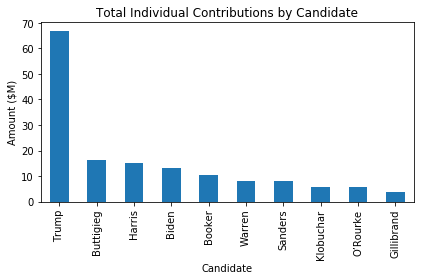

In [141]:
temp = contributions.groupby('cand_nm')['contb_receipt_amt'].sum().apply(lambda x: x/1000000).sort_values(ascending=False).iloc[:10]
temp.index = [s.split(',')[0] for s in temp.index.values]
temp.plot.bar()
plt.xlabel("Candidate")
plt.ylabel("Amount ($M)")
plt.title("Total Individual Contributions by Candidate")
plt.tight_layout()
plt.savefig('contributions.png')

In [14]:
contributions_by_individual = contributions.groupby('contbr_nm')['contb_receipt_amt'].sum().sort_values()
contributions_by_individual.tail()

contbr_nm
WOMENCOUNT PAC                                            107460.00
TULSI FOR HAWAI'I                                         132078.00
CORY BOOKER FOR SENATE - UNITEMIZED                       901432.04
KAMALA HARRIS FOR SENATE - UNITEMIZED                    1016308.67
TRUMP MAKE AMERICA GREAT AGAIN COMMITTEE - UNITEMIZED    6713527.71
Name: contb_receipt_amt, dtype: float64

# Plot of Contributions by State

Text(0.5, 1.0, 'Total Contributions by State')

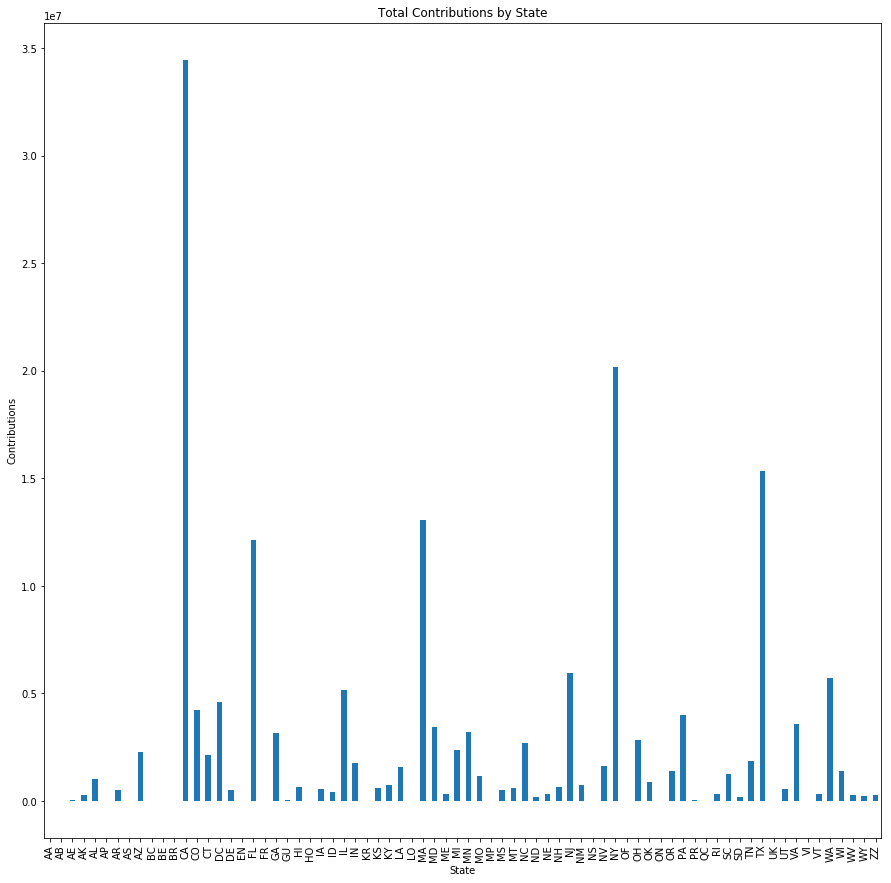

In [15]:
plt.figure(figsize=(15,15))
contributions.groupby('contbr_st')['contb_receipt_amt'].sum().plot.bar()
plt.xlabel('State')
plt.ylabel('Contributions')
plt.title('Total Contributions by State')

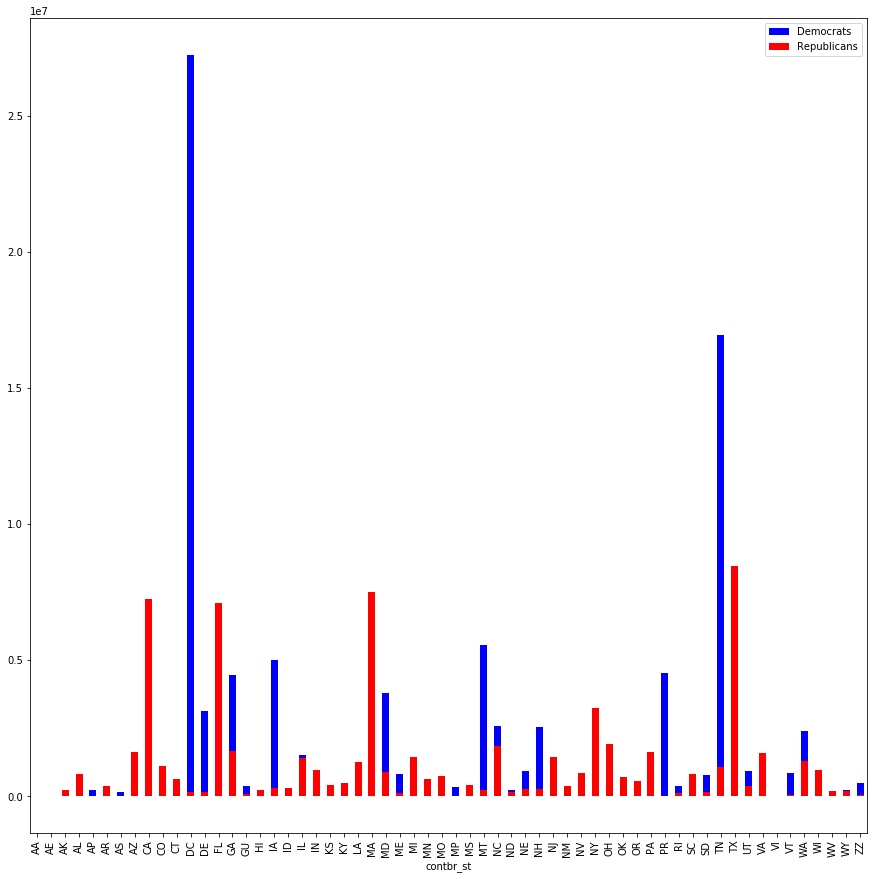

In [16]:
plt.figure(figsize=(15,15))
dems.groupby('contbr_st')['contb_receipt_amt'].sum().plot.bar(label='Democrats', color='b')
repubs.groupby('contbr_st')['contb_receipt_amt'].sum().plot.bar(label='Republicans', color='r')
plt.legend()

# Above plot hides data, here is its opposite

In [127]:
temp = contributions.groupby('contbr_occupation').size().sort_values(ascending=False).where(lambda x: x>100).dropna()
print(len(temp))
temp

647


contbr_occupation
RETIRED                          401525.0
NOT EMPLOYED                     147178.0
INFORMATION REQUESTED             58576.0
ATTORNEY                          27556.0
PHYSICIAN                         21437.0
ENGINEER                          14388.0
SALES                             13410.0
ENTREPRENEUR                      12142.0
TEACHER                           11998.0
SELF-EMPLOYED                     11354.0
CONSULTANT                        11199.0
OWNER                             11119.0
MANAGER                           10289.0
CEO                                9665.0
SOFTWARE ENGINEER                  8563.0
PROFESSOR                          7923.0
BUSINESS OWNER                     7603.0
PRESIDENT                          7234.0
HOMEMAKER                          6506.0
LAWYER                             5837.0
REAL ESTATE                        5826.0
EXECUTIVE                          5672.0
REALTOR                            5113.0
REGISTERED NURSE

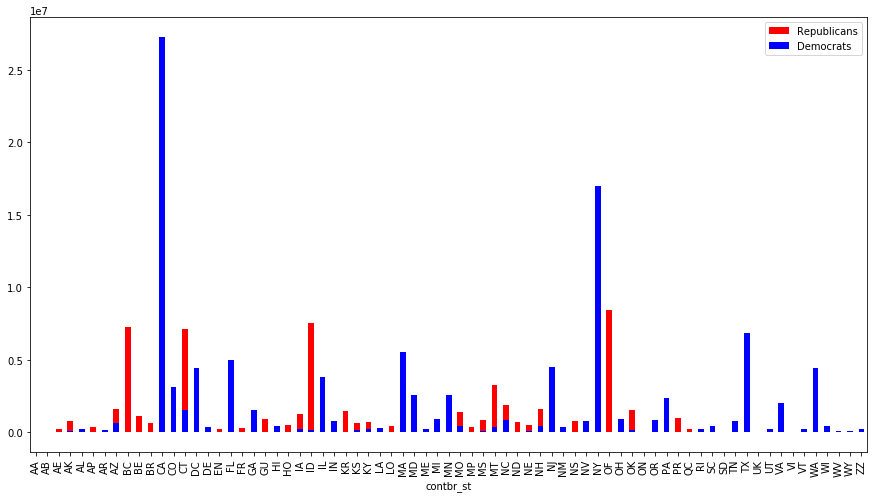

In [117]:
plt.figure(figsize=(15,8))
repubs.groupby('contbr_st')['contb_receipt_amt'].sum().plot.bar(label='Republicans', color='r')
dems.groupby('contbr_st')['contb_receipt_amt'].sum().plot.bar(label='Democrats', color='b')
plt.legend()
plt.savefig('barplot_by_state.png')

# Why is it so hard to have the bars be side by side and not overlapped :(

<Figure size 1080x1080 with 0 Axes>

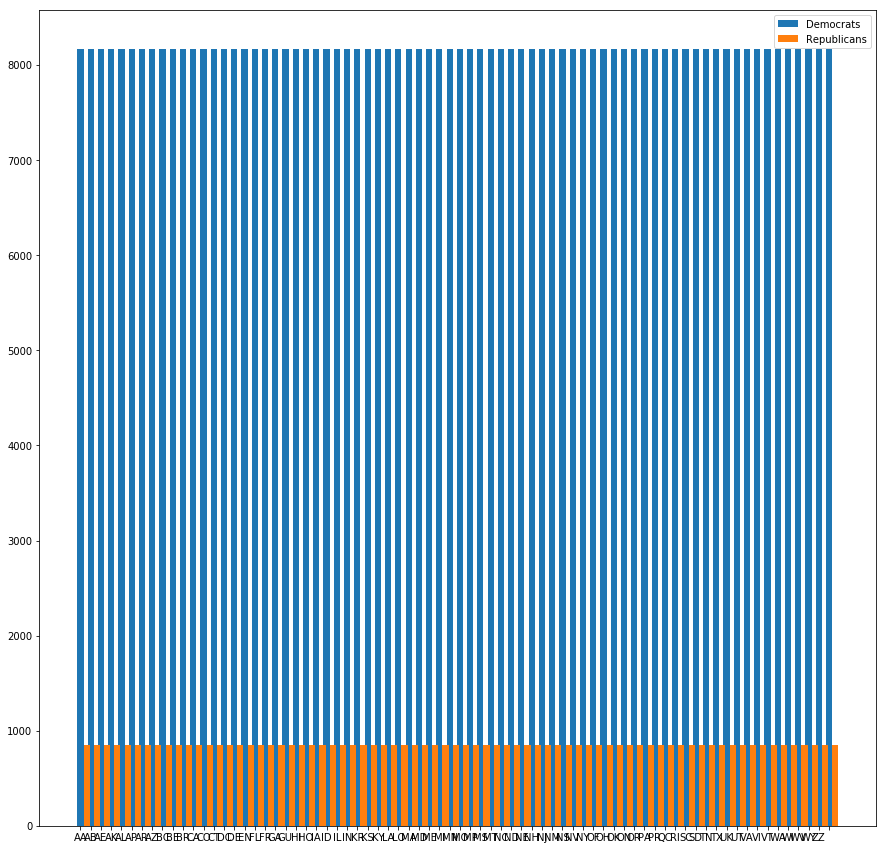

In [18]:
plt.figure(figsize=(15,15))
n_states = len(contributions['contbr_st'].unique())
ind = np.arange(n_states)/4 + .15
width = .15
#dems.groupby('contbr_st')['contb_receipt_amt'].sum().plot.bar(x=ind, width=width, label='Democrats', color='b')
#repubs.groupby('contbr_st')['contb_receipt_amt'].sum().plot.bar(x=ind+width, width=width, label='Republicans', color='r')
t1 = dems.groupby('contbr_st')['contb_receipt_amt'].sum()
t2 = repubs.groupby('contbr_st')['contb_receipt_amt'].sum()
fig, ax = plt.subplots(figsize=(15,15))
ax.bar(ind, t1.values[0], width, label='Democrats')
ax.bar(ind+width, t2.values[0], width, label='Republicans')
ax.set_xticks(ind)
ax.set_xticklabels(t1.index)
plt.legend()

# Plotting contributions to a candidate over time
## List of Candidates

In [19]:
print(contributions['cand_nm'].unique())

['Delaney, John K.' 'Trump, Donald J.' 'Yang, Andrew'
 'Ojeda, Richard Neece II' 'Castro, Julián' 'Warren, Elizabeth '
 'Gabbard, Tulsi' 'Gillibrand, Kirsten ' 'Harris, Kamala D.'
 'Booker, Cory A.' 'Williamson, Marianne ' 'Klobuchar, Amy J.'
 'Sanders, Bernard' 'Buttigieg, Pete' 'Inslee, Jay R'
 'Hickenlooper, John W.' 'O’Rourke, Robert Beto' 'Gravel, Maurice Robert'
 'Weld, William Floyd (Bill)' 'Swalwell, Eric Michael' 'Ryan, Timothy J.'
 'Biden, Joseph R Jr' 'Moulton, Seth' 'Bennet, Michael F.'
 'Bullock, Steve' 'de Blasio, Bill']


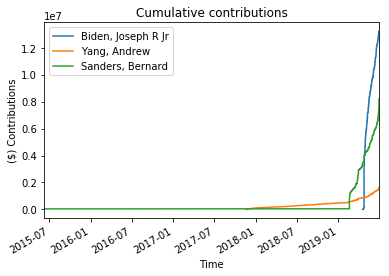

In [22]:
def plot_contributions_over_time(candidates):
    for candidate in candidates:
        df = contributions[contributions['cand_nm'] == candidate].sort_values(by='contb_receipt_dt')
        df.index = df['contb_receipt_dt']
        df['contb_receipt_amt'].cumsum().plot(label=candidate)
    plt.ylabel('($) Contributions')
    plt.xlabel('Time')
    plt.title(f'Cumulative contributions')
    plt.legend()
plot_contributions_over_time(['Biden, Joseph R Jr', 'Yang, Andrew', 'Sanders, Bernard'])

## Contributors to Multiple Campaigns

In [ ]:
contributors_to_multiple_campaigns = contributions.groupby('contbr_nm').filter(lambda x : len(x['cand_nm'].unique()) > 1)

In [ ]:
contributors_to_multiple_campaigns.groupby(['contbr_nm', 'cand_nm']).sum()['contb_receipt_amt']

In [ ]:
print(f'Number of people contributing to multiple candidates: {len(contributors_to_multiple_campaigns["contbr_nm"].unique())}')

## Graph Construction
Options:
1. Undirected graph, unweighted (for now)
   - Draw an edge between contributors if they contributed to the same candidate

2. Directed multigraph, weighted
   - draw an edge from contributor to candidate with weight being amount of contributions
   
Need to be smart potentially about graph construction, considering high number of edges with option(1)
Below code will crash kernel

In [ ]:
print('Number of edges in graph:')
contributions.groupby('cand_nm').size().sum()

In [ ]:
print('Number of noes in graph:')
len(contributions['contbr_nm'].unique())

In [ ]:
contributions.groupby('contbr_nm').apply(lambda x: x.)

In [ ]:
#import itertools
#edge_list = []
#contributions.groupby('cand_nm').apply(lambda x: edge_list.extend(itertools.combinations(x['contbr_nm'], 2)))

In [26]:
contributions

cmte_id    cand_id           cand_nm                 contbr_nm  \
0        C00508416  P00006213  Delaney, John K.          JACKLIN, CHARLES   
1        C00508416  P00006213  Delaney, John K.           STACEY, WILLIAM   
2        C00508416  P00006213  Delaney, John K.          DIRUSSO, ANTHONY   
3        C00508416  P00006213  Delaney, John K.          DIRUSSO, ANTHONY   
4        C00508416  P00006213  Delaney, John K.          SPIEGEL, RICHARD   
5        C00508416  P00006213  Delaney, John K.          SPIEGEL, RICHARD   
6        C00508416  P00006213  Delaney, John K.          SPIEGEL, RICHARD   
7        C00508416  P00006213  Delaney, John K.          SPIEGEL, RICHARD   
8        C00508416  P00006213  Delaney, John K.          SPIEGEL, RICHARD   
9        C00508416  P00006213  Delaney, John K.             GRAND, MARCIA   
10       C00508416  P00006213  Delaney, John K.          DIRUSSO, ANTHONY   
11       C00508416  P00006213  Delaney, John K.               LEWIS, SARA   
12       C00508416  P00006213  Delaney, John K.          SPIEGEL, RICHARD   
13       C00508416  P00006213  Delaney, John K.           HIGLEY, BRIDGET   
14       C00508416  P00006213  Delaney, John K.         PIECZYNSKI, JAMES   
15       C00508416  P00006213  Delaney, John K.             BAUCH, THOMAS   
16       C00508416  P00006213  Delaney, John K.       WILLIAMSON, STEPHEN   
17       C00508416  P00006213  Delaney, John K.            ELVERUM, JAMIE   
18       C00508416  P00006213  Delaney, John K.            CORMACK, DAVID   
19       C00508416  P00006213  Delaney, John K.           FISHER, JOHN J.   
20       C00508416  P00006213  Delaney, John K.       WILLIAMSON, STEPHEN   
21       C00508416  P00006213  Delaney, John K.            ELVERUM, JAMIE   
22       C00508416  P00006213  Delaney, John K.            MOORE, MERIDEE   
23       C00508416  P00006213  Delaney, John K.        ROSENTHAL, RICHARD   
24       C00508416  P00006213  Delaney, John K.              CORWIN, JACK   
25       C00508416  P00006213  Delaney, John K.             NAYLOR, DAVID   
26       C00508416  P00006213  Delaney, John K.       WILLIAMSON, STEPHEN   
27       C00508416  P00006213  Delaney, John K.           WILLIAMS, FRANK   
28       C00508416  P00006213  Delaney, John K.              BAKER, JASON   
29       C00508416  P00006213  Delaney, John K.               KOHL, ALLEN   
...            ...        ...               ...                       ...   
1322353  C00706697  P00012054   de Blasio, Bill               ELIAS, M.J.   
1322354  C00706697  P00012054   de Blasio, Bill              ELIAS, NITZA   
1322355  C00706697  P00012054   de Blasio, Bill            ELIAS, SOLOMON   
1322356  C00706697  P00012054   de Blasio, Bill               ELIAS, SURI   
1322357  C00706697  P00012054   de Blasio, Bill           ELMAN, MITCHELL   
1322358  C00706697  P00012054   de Blasio, Bill          CORPORAN, JUAN E   
1322359  C00706697  P00012054   de Blasio, Bill            CORRAL, DANIEL   
1322360  C00706697  P00012054   de Blasio, Bill     CUMMINGS, CHRISTOPHER   
1322361  C00706697  P00012054   de Blasio, Bill     CURRIE-HALPERN, SARAH   
1322362  C00706697  P00012054   de Blasio, Bill             CUSHNER, FRED   
1322363  C00706697  P00012054   de Blasio, Bill           CUTROFELLO, TOM   
1322364  C00706697  P00012054   de Blasio, Bill               CYGLER, ANN   
1322365  C00706697  P00012054   de Blasio, Bill              DADY, ANDREW   
1322366  C00706697  P00012054   de Blasio, Bill                DADY, JODI   
1322367  C00706697  P00012054   de Blasio, Bill          DAVIDSON, STUART   
1322368  C00706697  P00012054   de Blasio, Bill              KAUR, JASBIR   
1322369  C00706697  P00012054   de Blasio, Bill              KAUR, JASBIR   
1322370  C00706697  P00012054   de Blasio, Bill         XAVIER, EDMICELLY   
1322371  C00706697  P00012054   de Blasio, Bill       GONSALVES, BEIYANIL   
1322372  C00706697  P00012054   de Blasio, Bill            PENA, ELIEVANA   
1322373

In [60]:
by_state = contributions.groupby('contbr_st')['contb_receipt_amt'].sum()
by_state.index = [states.get(x, 'Unknown') for x in by_state.index.values]
by_state = by_state.dropna(axis='index')
by_state = by_state.where(lambda x: x.index != 'Unknown').dropna()

## Plotting Statistics to Map
Map data found at https://www.census.gov/cgi-bin/geo/shapefiles/index.php?year=2019&layergroup=States+%28and+equivalent%29

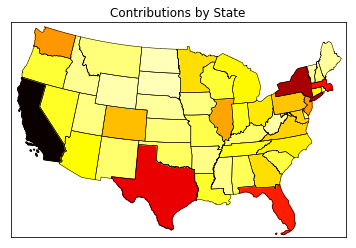

In [114]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap as Basemap
from matplotlib.colors import rgb2hex
from matplotlib.patches import Polygon
# Lambert Conformal map of lower 48 states.
m = Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,
        projection='lcc',lat_1=33,lat_2=45,lon_0=-95)
# draw state boundaries.
# data from U.S Census Bureau
# http://www.census.gov/geo/www/cob/st2000.html
shp_info = m.readshapefile('tl_2019_us_state','states',drawbounds=True)
# population density by state from
# http://en.wikipedia.org/wiki/List_of_U.S._states_by_population_density
# choose a color for each state based on population density.
colors={}
statenames=[]
cmap = plt.cm.hot # use 'hot' colormap
vmin = 0; vmax = by_state.max() # set range.
by_state_dict = dict(by_state)
for shapedict in m.states_info:
    statename = shapedict['NAME']
    # skip DC and Puerto Rico.
    if statename in by_state_dict.keys():
        amt = by_state_dict[statename]
        # calling colormap with value between 0 and 1 returns
        # rgba value.  Invert color range (hot colors are high
        # population), take sqrt root to spread out colors more.
        colors[statename] = cmap(1-np.sqrt((amt-vmin)/(vmax-vmin)))[:3]
    statenames.append(statename)
# cycle through state names, color each one.
ax = plt.gca() # get current axes instance
for nshape,seg in enumerate(m.states):
    # skip DC and Puerto Rico.
    if statenames[nshape] in by_state_dict.keys():
    # Offset Alaska and Hawaii to the lower-left corner. 
        color = rgb2hex(colors[statenames[nshape]]) 
        poly = Polygon(seg,facecolor=color,edgecolor=color)
        ax.add_patch(poly)
norm=np.array([cmap(1.-np.sqrt((amt-vmin)/(vmax-vmin))) for amt in by_state_dict.values()])
plt.title('Contributions by State')
#fig.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap), ax=ax)
temp = plt.cm.ScalarMappable(norm=norm, cmap=cmap)
temp.set_array(norm)
#plt.colorbar(temp)
plt.savefig('heatmap.png')
plt.show()


In [ ]:
states = {
        'AK': 'Alaska',
        'AL': 'Alabama',
        'AR': 'Arkansas',
        'AS': 'American Samoa',
        'AZ': 'Arizona',
        'CA': 'California',
        'CO': 'Colorado',
        'CT': 'Connecticut',
        'DC': 'District of Columbia',
        'DE': 'Delaware',
        'FL': 'Florida',
        'GA': 'Georgia',
        'GU': 'Guam',
        'HI': 'Hawaii',
        'IA': 'Iowa',
        'ID': 'Idaho',
        'IL': 'Illinois',
        'IN': 'Indiana',
        'KS': 'Kansas',
        'KY': 'Kentucky',
        'LA': 'Louisiana',
        'MA': 'Massachusetts',
        'MD': 'Maryland',
        'ME': 'Maine',
        'MI': 'Michigan',
        'MN': 'Minnesota',
        'MO': 'Missouri',
        'MP': 'Northern Mariana Islands',
        'MS': 'Mississippi',
        'MT': 'Montana',
        'NA': 'National',
        'NC': 'North Carolina',
        'ND': 'North Dakota',
        'NE': 'Nebraska',
        'NH': 'New Hampshire',
        'NJ': 'New Jersey',
        'NM': 'New Mexico',
        'NV': 'Nevada',
        'NY': 'New York',
        'OH': 'Ohio',
        'OK': 'Oklahoma',
        'OR': 'Oregon',
        'PA': 'Pennsylvania',
        'PR': 'Puerto Rico',
        'RI': 'Rhode Island',
        'SC': 'South Carolina',
        'SD': 'South Dakota',
        'TN': 'Tennessee',
        'TX': 'Texas',
        'UT': 'Utah',
        'VA': 'Virginia',
        'VI': 'Virgin Islands',
        'VT': 'Vermont',
        'WA': 'Washington',
        'WI': 'Wisconsin',
        'WV': 'West Virginia',
        'WY': 'Wyoming'
}

In [68]:
print('West Virginia' in m.states_info)

False
